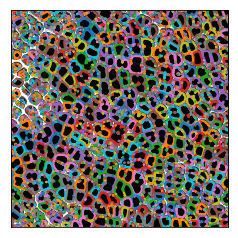

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage import measure
from skimage.color import rgb2grey

r = rgb2grey(mpimg.imread('image (2).png'))

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.1)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)

for contour in (contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

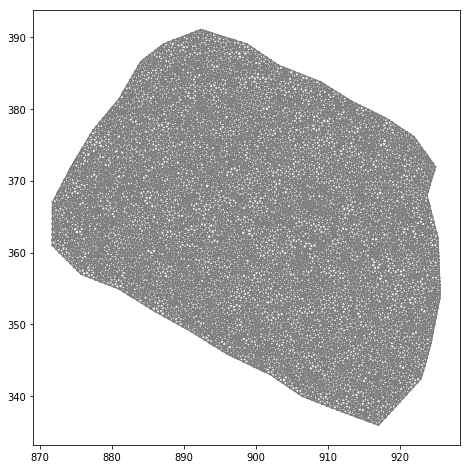

In [13]:
from dolfin import *
from mshr import *

# Select the biggest contour
max_contour = sorted(contours, key=lambda x:len(x), reverse=True)[185]

# Generate the mesh
domain_vertices = [Point(x,y) for x,y in max_contour][::8]

n = 64
geometry = Polygon(domain_vertices)
mesh = generate_mesh(geometry,n)
plt.figure(figsize=(8,8))
plot(mesh)

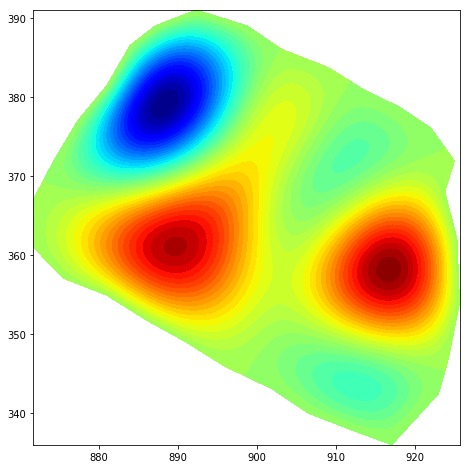

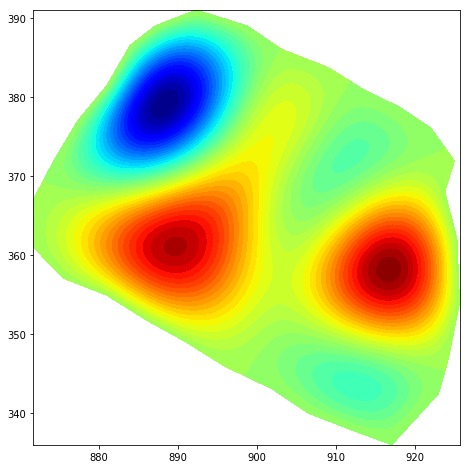

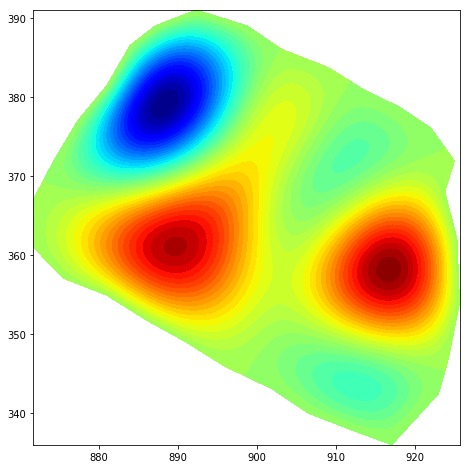

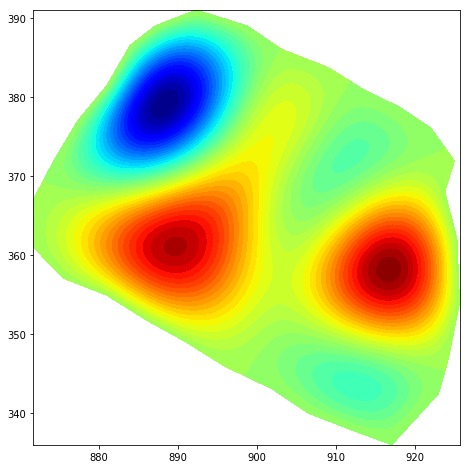

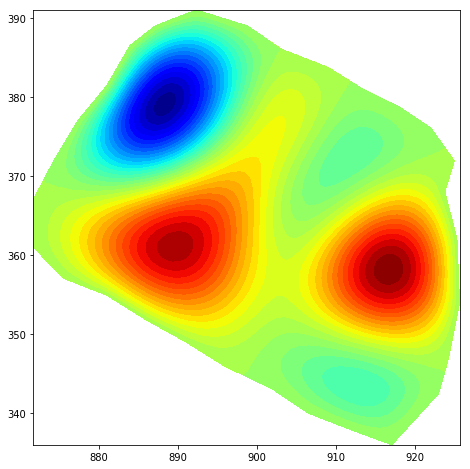

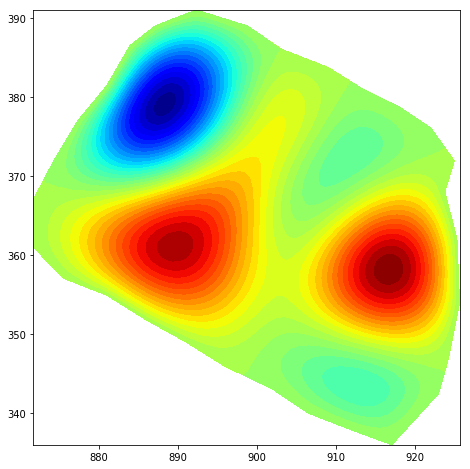

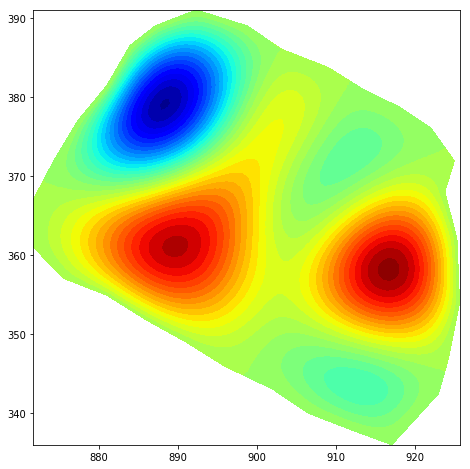

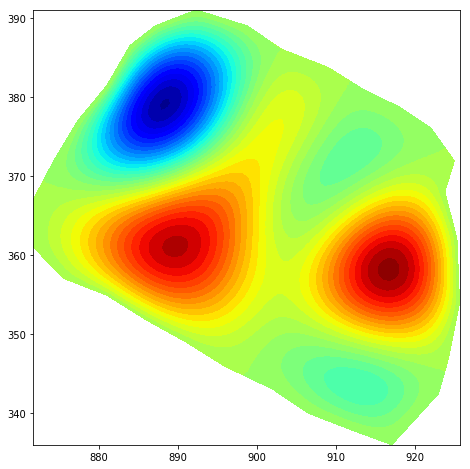

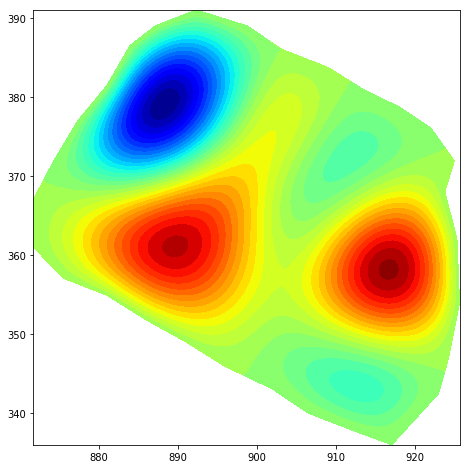

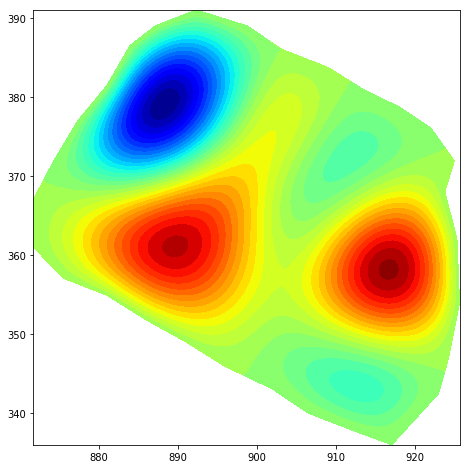

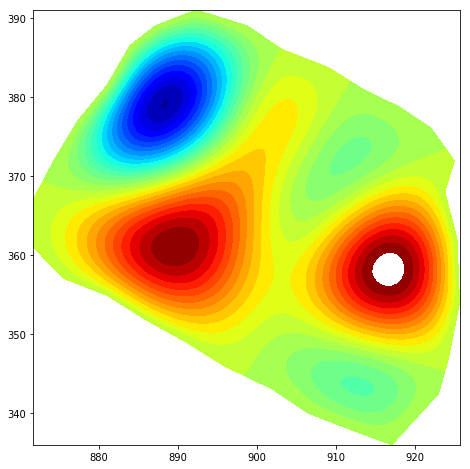

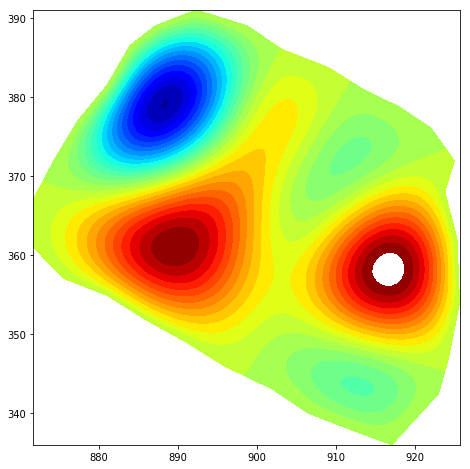

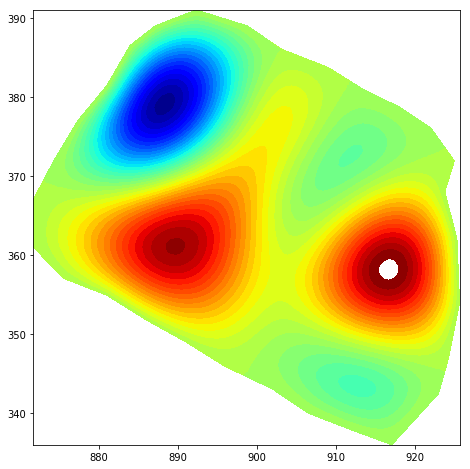

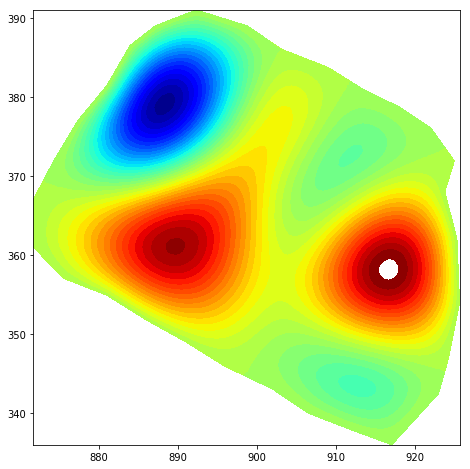

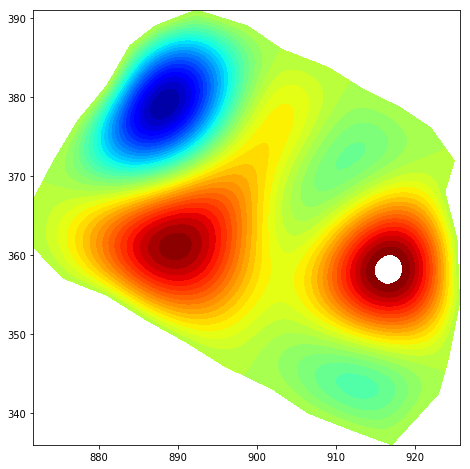

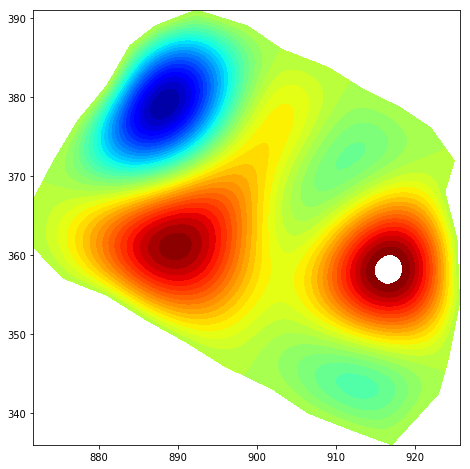

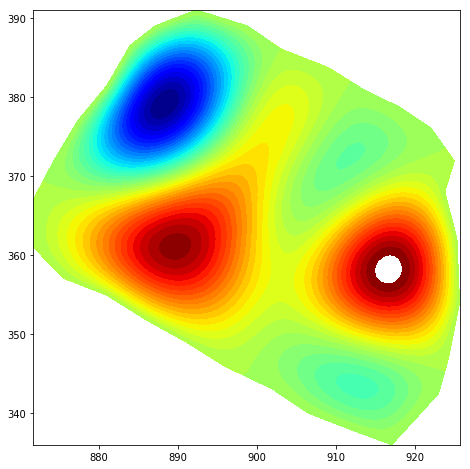

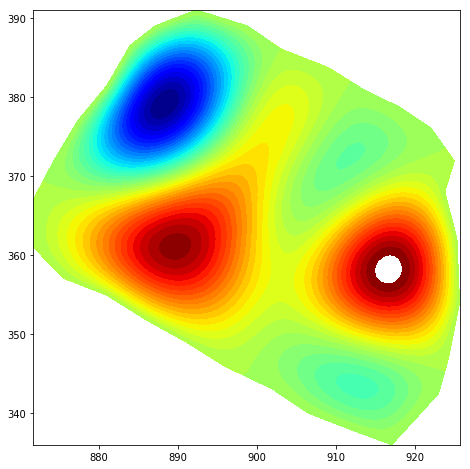

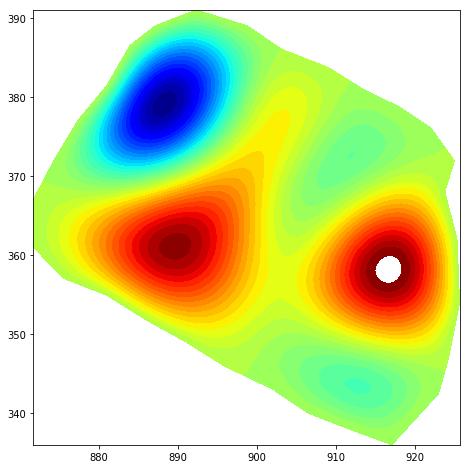

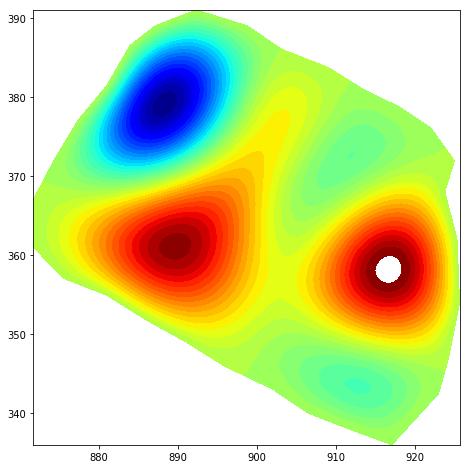

In [44]:
#Plot of the evolution of the function
# Used lambda(t) = -t^2 + t

for x in range(20):
    x = x/2
    eig = Function(V)
    eig_vec = eig.vector()

    r, c, rx, cx = eigensolver.get_eigenpair(0)
    eig_vec[:] = rx
    eig = project(eig*exp(-x**2 + x), V)
    #plt.figure(figsize=(8,8))
    #plot(eig, cmap = 'jet', vmin = -0.15, vmax = 0.15)
    #print(np.min(eig.vector().array()), np,max(eig.vector().array()))

    wk = Function(V)
    wk_vec = wk.vector()

    
    for i in range(1, 10):
        r, c, rx, cx = eigensolver.get_eigenpair(i)
        wk_vec[:] = rx
        eig = project(eig + wk * exp(-x**2 + x), V)
        #print(np.min(wk.vector().array()), np,max(wk.vector().array()))
    
    
   
    plt.figure(figsize=(8,8))
    plot(eig, cmap = 'jet')
# , vmin = -0.10973330882958017, vmax = 0.09319730670101349)

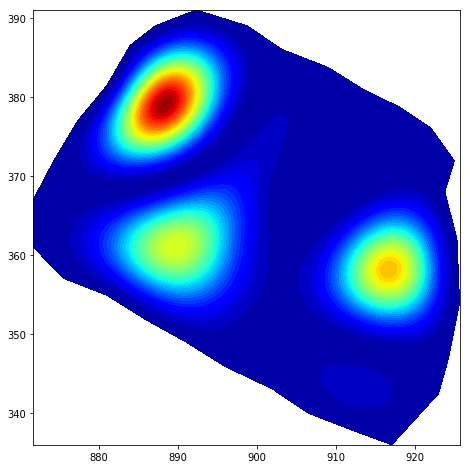

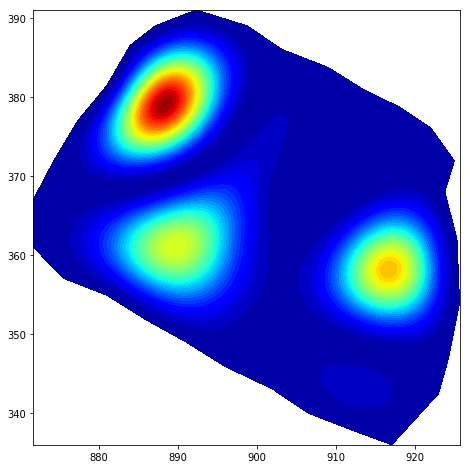

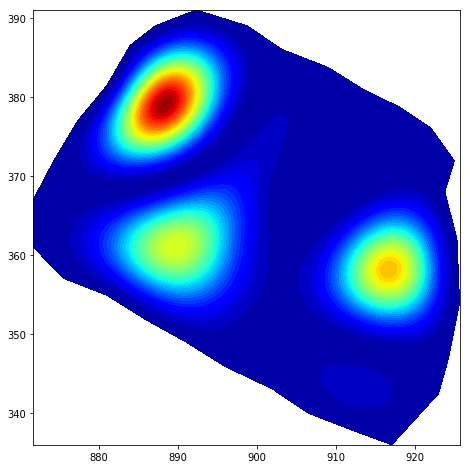

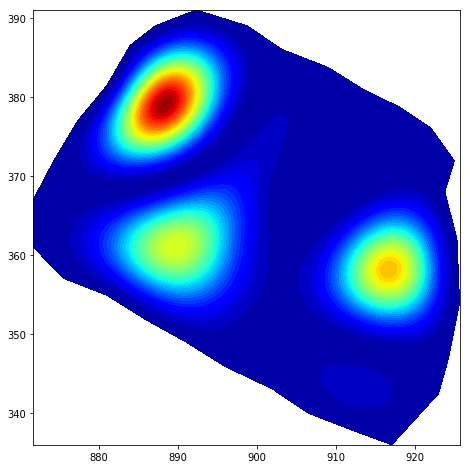

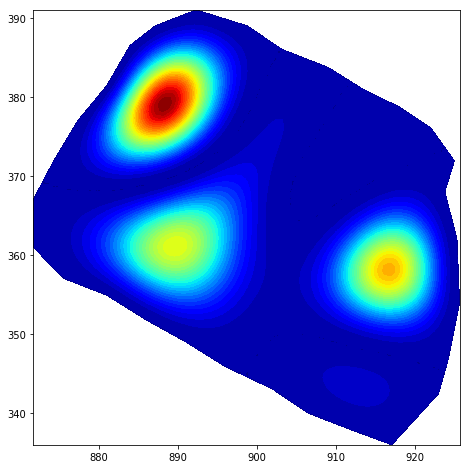

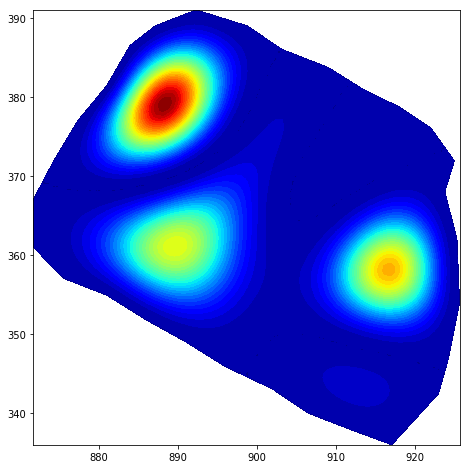

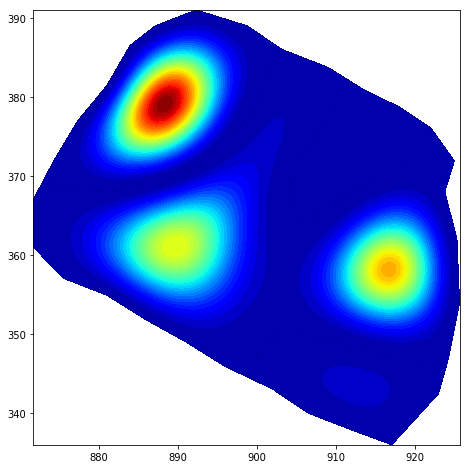

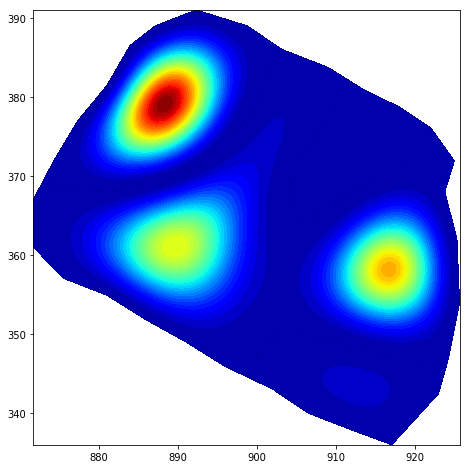

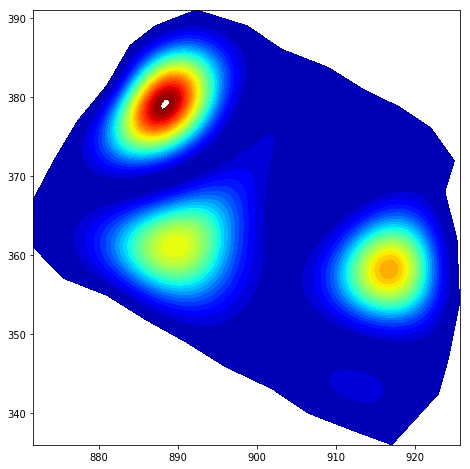

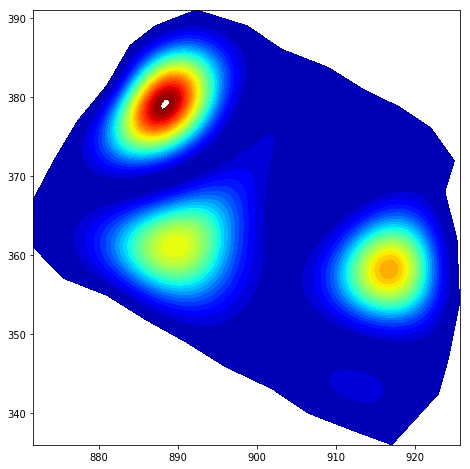

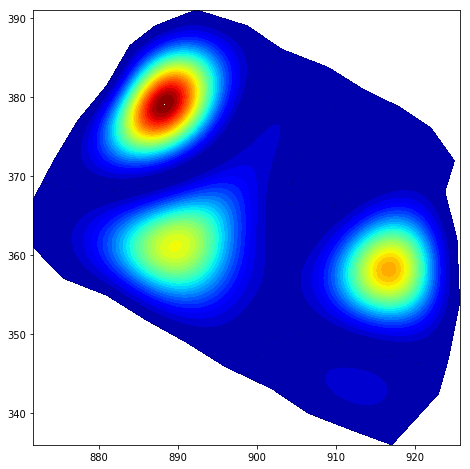

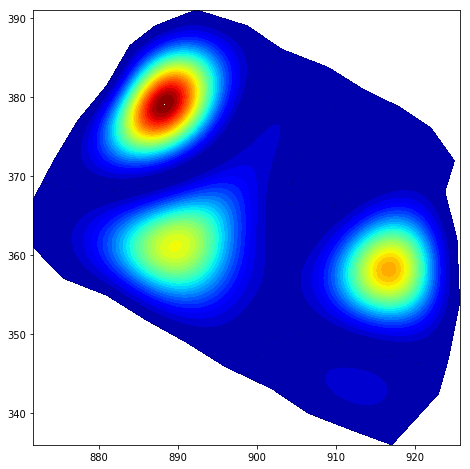

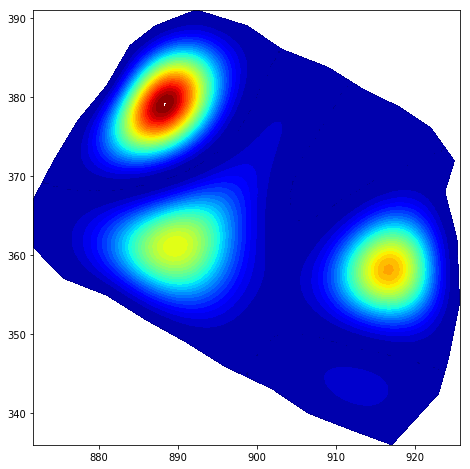

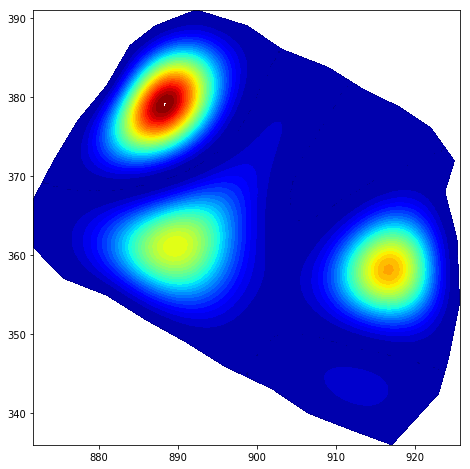

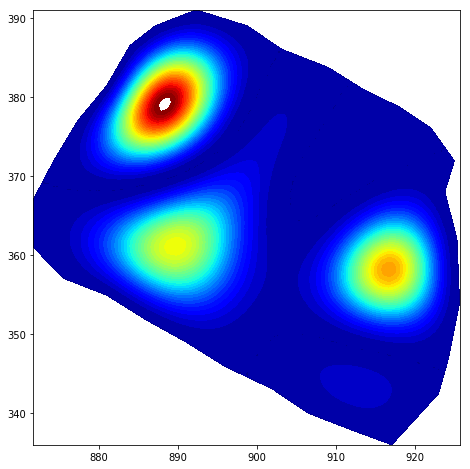

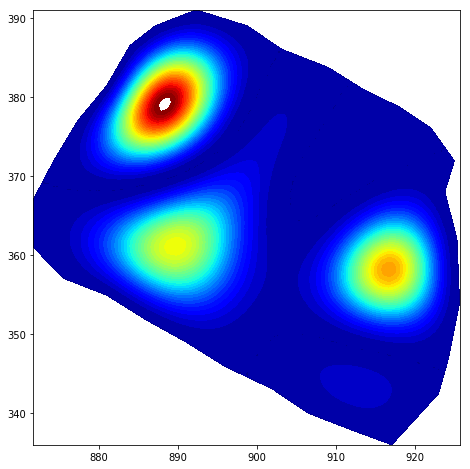

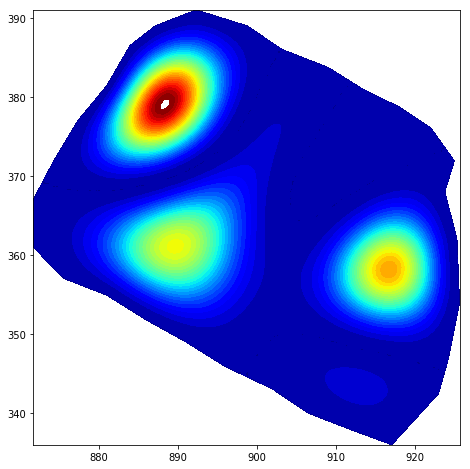

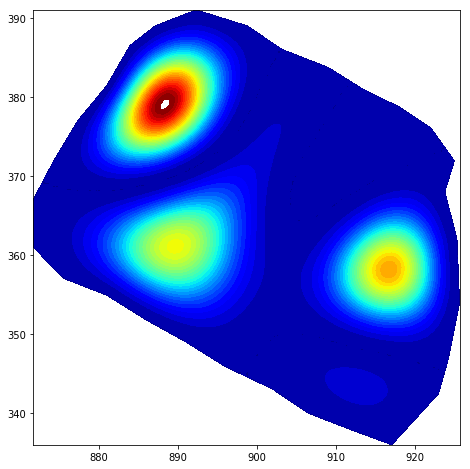

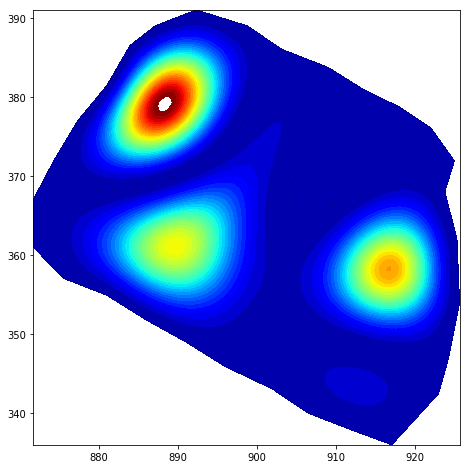

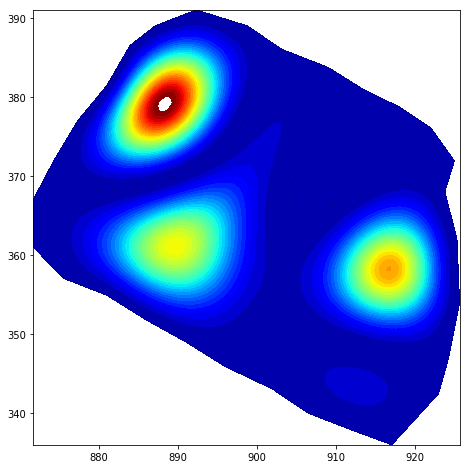

In [40]:
#Plot of the evolution of the square function
# Used lambda(t) = -t^2 + t
for x in range(20):
    x = x/2
    eig = Function(V)
    eig_vec = eig.vector()

    r, c, rx, cx = eigensolver.get_eigenpair(0)
    eig_vec[:] = rx
    eig = project(eig*exp(-x**2 + x), V)
    #plt.figure(figsize=(8,8))
    #plot(eig, cmap = 'jet', vmin = -0.15, vmax = 0.15)
    #print(np.min(eig.vector().array()), np,max(eig.vector().array()))

    wk = Function(V)
    wk_vec = wk.vector()


    for i in range(1, 10):
        r, c, rx, cx = eigensolver.get_eigenpair(i)
        wk_vec[:] = rx
        eig = project(eig + wk * exp(-x**2 + x), V)
        #print(np.min(wk.vector().array()), np,max(wk.vector().array()))

    plt.figure(figsize=(8,8))
    plot(eig * eig, cmap = 'jet')

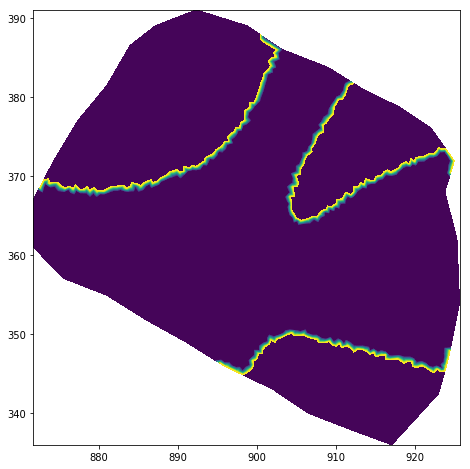

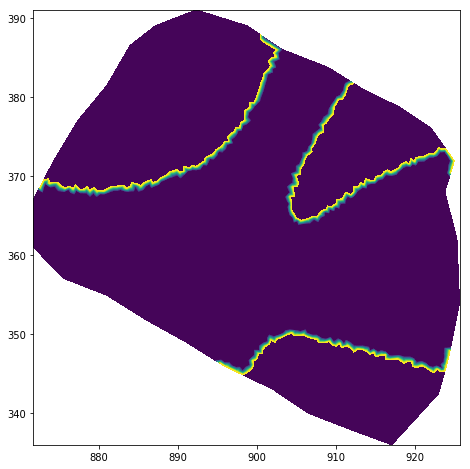

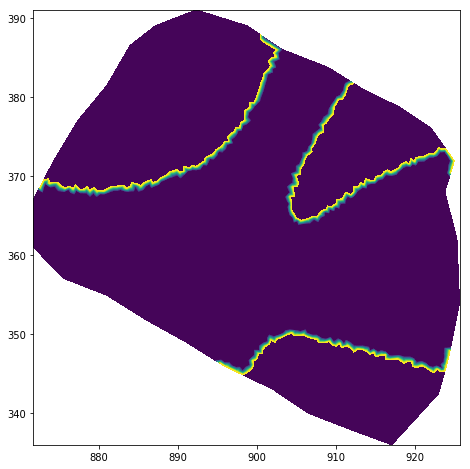

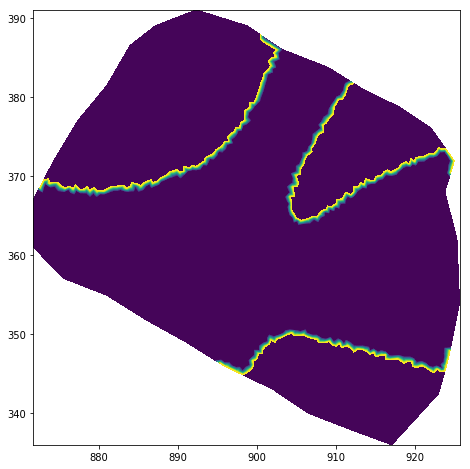

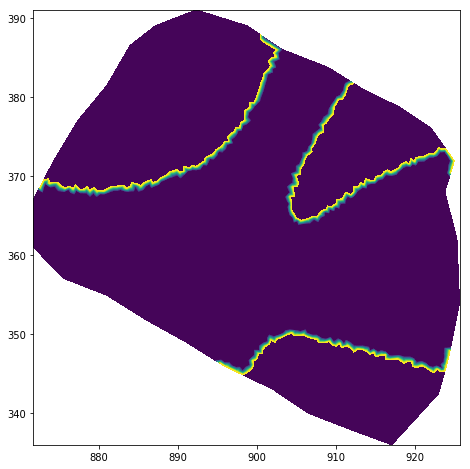

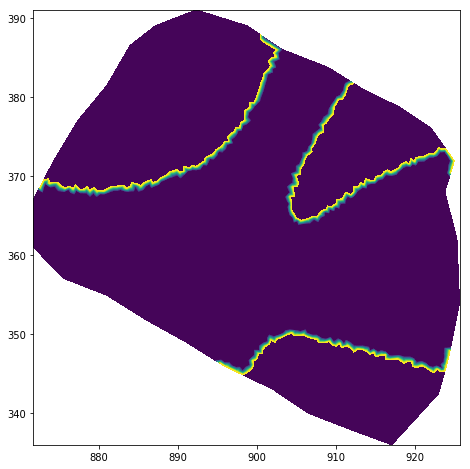

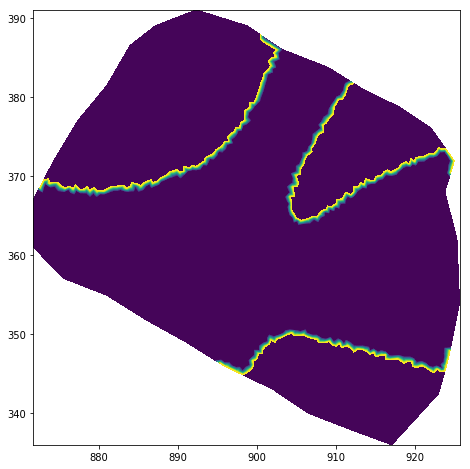

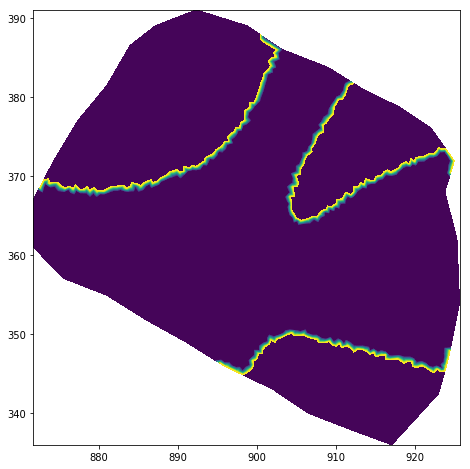

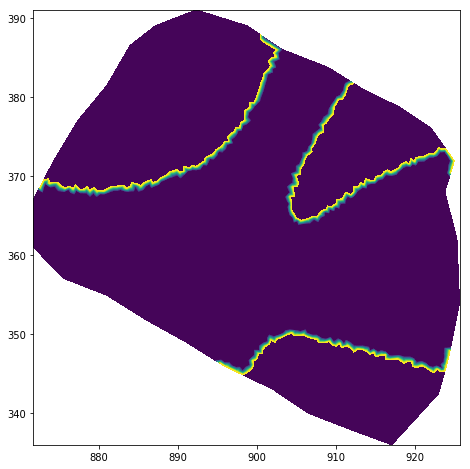

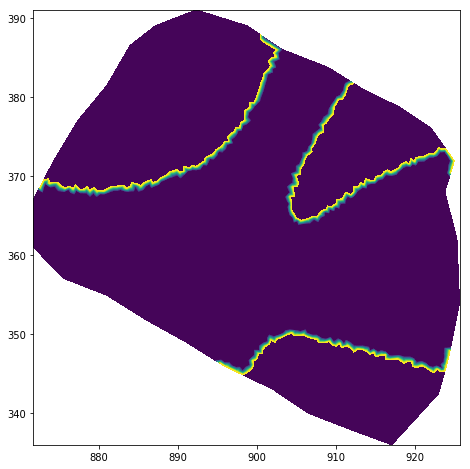

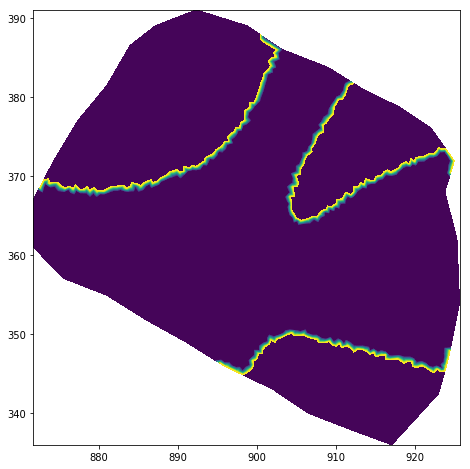

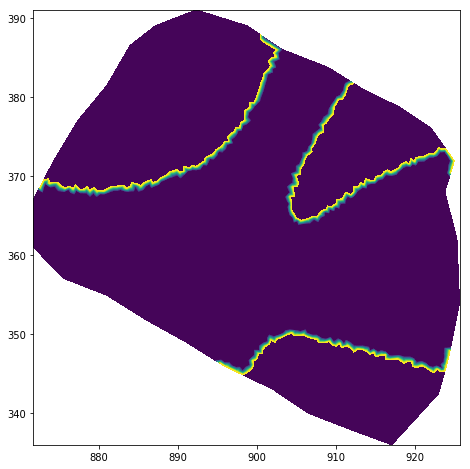

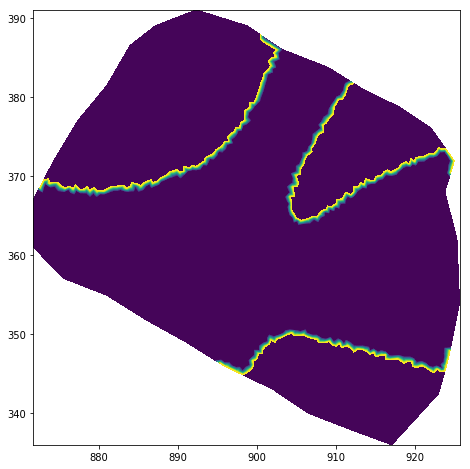

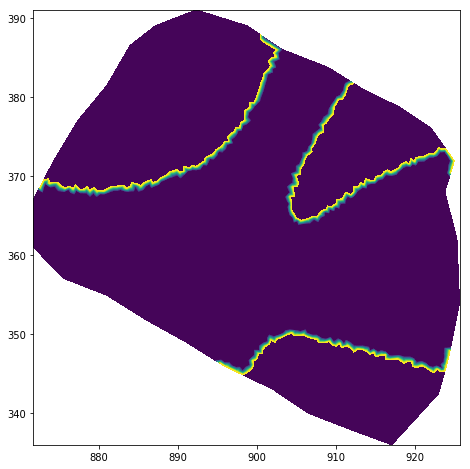

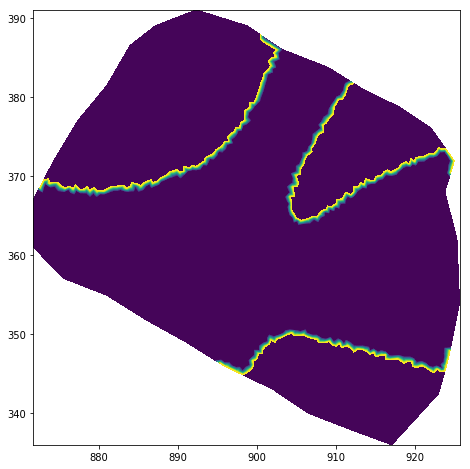

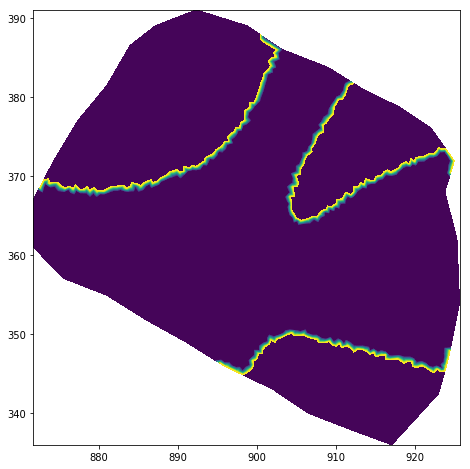

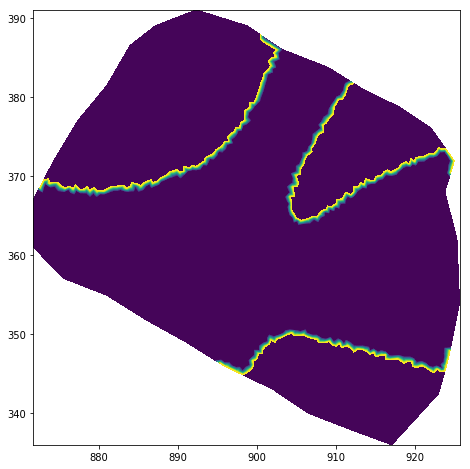

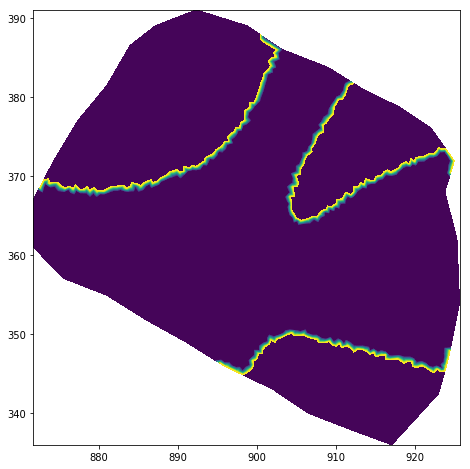

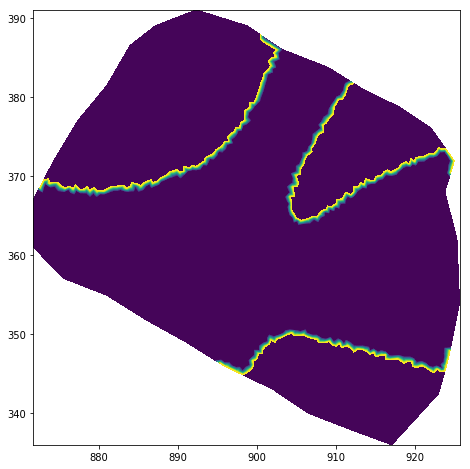

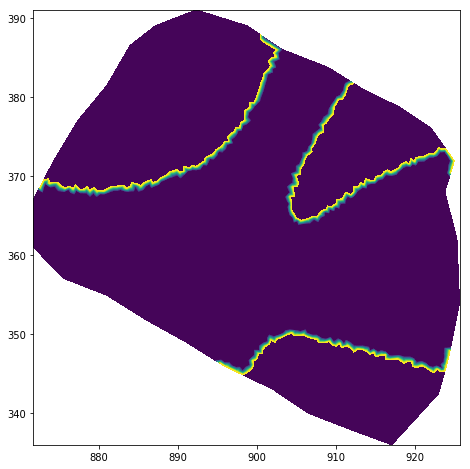

In [45]:
#Plot of the evolution of the zero crossing function
# Used lambda(t) = -t^2 + t

def division(eig):
    aux = project(eig, V)
    aux_vec = aux.vector()
    for j in range(len(aux.vector())):
        v = aux.vector()[j]
        if v>0:
            aux.vector()[j] = 1
        else:
            aux.vector()[j] = 0

    plt.figure(figsize=(8,8))
    plot(aux)

    aux = project(eig, V)
    aux_vec = aux.vector()
    for j in range(len(aux.vector())):
        v = aux.vector()[j]
        if v<0:
            aux.vector()[j] = 1
        else:
            aux.vector()[j] = 0


    plot(aux)


for x in range(20):
    x = x/2
    eig = Function(V)
    eig_vec = eig.vector()

    r, c, rx, cx = eigensolver.get_eigenpair(0)
    eig_vec[:] = rx
    eig = project(eig*exp(-x**2 + x), V)
    #plt.figure(figsize=(8,8))
    #plot(eig, cmap = 'jet', vmin = -0.15, vmax = 0.15)
    #print(np.min(eig.vector().array()), np,max(eig.vector().array()))

    wk = Function(V)
    wk_vec = wk.vector()


    for i in range(1, 10):
        r, c, rx, cx = eigensolver.get_eigenpair(i)
        wk_vec[:] = rx
        eig = project(eig + wk * exp(-x**2 + x), V)
        #print(np.min(wk.vector().array()), np,max(wk.vector().array()))

    division(eig)